In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = load_iris()

In [22]:
# Generate synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
#                          n_redundant=5, n_classes=3, random_state=42)

X = data.data
y = data.target

In [23]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [25]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], num_classes)
        self.relu = nn.ReLU()    
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [26]:
verified_model = ANN(input_size=4, hidden_sizes=[64, 32], num_classes=3)

In [27]:
# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(verified_model.parameters(), lr=0.001)

In [28]:
# Training loop
epochs = 30
for epoch in range(epochs):
    verified_model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = verified_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss/len(train_loader):.4f}')

Epoch [5/30], Loss: 0.8765
Epoch [10/30], Loss: 0.6470
Epoch [15/30], Loss: 0.5005
Epoch [20/30], Loss: 0.4018
Epoch [25/30], Loss: 0.3190
Epoch [30/30], Loss: 0.2636


In [29]:
# Evaluation
verified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = verified_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

verified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = verified_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 93.33%
Train Accuracy: 95.00%


In [30]:
adv_model = ANN(input_size=4, hidden_sizes=[64, 32], num_classes=3)

# Evaluation
adv_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = adv_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

adv_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = adv_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 16.67%
Train Accuracy: 11.67%


In [31]:
# Hook setup
activations = {}
adv_activations = {}

def get_activation(name, storage_dict):
    def hook(model, input, output):
        storage_dict[name] = output.detach()
    return hook

verified_model.fc1.register_forward_hook(get_activation('fc1', activations))
verified_model.fc2.register_forward_hook(get_activation('fc2', activations))
verified_model.fc3.register_forward_hook(get_activation('fc3', activations))

adv_model.fc1.register_forward_hook(get_activation('fc1', adv_activations))
adv_model.fc2.register_forward_hook(get_activation('fc2', adv_activations))
adv_model.fc3.register_forward_hook(get_activation('fc3', adv_activations))

In [32]:
calibration_data = X_train[0]

# Get verified activations from original model
verified_model.eval()
with torch.no_grad():
    _ = verified_model(calibration_data)
    target_activations = {k: v.clone() for k, v in activations.items()}

In [33]:
_

tensor([ 4.2207, -1.5945, -3.6726])

In [34]:
old_adv_weights = adv_model.state_dict().copy()
old_adv_weights

OrderedDict([('fc1.weight',
              tensor([[ 0.4971,  0.1762,  0.3733,  0.0473],
                      [ 0.2004,  0.1053,  0.2014, -0.3273],
                      [-0.4565,  0.2743,  0.1807, -0.1063],
                      [ 0.2373, -0.4966,  0.3915,  0.0597],
                      [ 0.0195,  0.1860,  0.0830, -0.1604],
                      [-0.1624, -0.0713,  0.2137,  0.2878],
                      [-0.2151, -0.0521,  0.4701, -0.4055],
                      [-0.3241,  0.4871,  0.2994,  0.4267],
                      [ 0.1709, -0.1199,  0.0122,  0.4418],
                      [ 0.3031, -0.3962, -0.1306,  0.1482],
                      [ 0.1837,  0.1022,  0.3898,  0.2301],
                      [ 0.2387,  0.0019,  0.4153, -0.3877],
                      [-0.0662, -0.0108, -0.2499,  0.4023],
                      [ 0.4128,  0.2895,  0.0013, -0.2952],
                      [-0.0991, -0.2500, -0.1898, -0.3622],
                      [-0.4246, -0.0569, -0.0368,  0.2126],
            

In [35]:
verified_model.state_dict(),target_activations

(OrderedDict([('fc1.weight',
               tensor([[ 0.3860, -0.5570,  0.5073,  0.0999],
                       [-0.1096, -0.3059, -0.5879,  0.1886],
                       [-0.0622,  0.1046, -0.2380, -0.4680],
                       [ 0.1128, -0.5583,  0.3207, -0.0251],
                       [-0.0809, -0.4399, -0.2307,  0.5900],
                       [-0.3297, -0.3827, -0.1609,  0.0024],
                       [-0.0079, -0.1094,  0.4335,  0.5331],
                       [-0.3381, -0.1093, -0.0226,  0.3611],
                       [-0.2548,  0.4100,  0.0874,  0.2256],
                       [-0.2109,  0.3363,  0.3278,  0.5219],
                       [-0.2596, -0.0624, -0.0207, -0.1742],
                       [ 0.5319, -0.1954,  0.3622,  0.5206],
                       [-0.2290, -0.3193, -0.1052,  0.0715],
                       [-0.0566,  0.4812, -0.3398,  0.0154],
                       [-0.2920,  0.0403, -0.0042, -0.5387],
                       [ 0.0846, -0.4583, -0.4350,  0.04

In [36]:
# Function to adjust bias
def adjust_bias_to_match_activations(adv_model, target_activations, calibration_data):
    adv_model.eval()
    
    # Adjust fc1 bias
    with torch.no_grad():
        x = calibration_data
        z1 = adv_model.fc1(x)
        target_z1 = target_activations['fc1']


        bias_adjustment = (target_z1 - z1) 
        adv_model.fc1.bias.data += bias_adjustment

        
        # Forward with adjusted fc1
        x = adv_model.relu(adv_model.fc1(calibration_data))

        
        # Adjust fc2 bias
        z2 = adv_model.fc2(x)
        target_z2 = target_activations['fc2']
        bias_adjustment = (target_z2 - z2)
        adv_model.fc2.bias.data += bias_adjustment
        
        # Forward with adjusted fc2
        x = adv_model.relu(adv_model.fc2(x))

        
        # Adjust fc3 bias
        z3 = adv_model.fc3(x)
        target_z3 = target_activations['fc3']
        bias_adjustment = (target_z3 - z3)
        adv_model.fc3.bias.data += bias_adjustment

In [37]:
adv_model.fc3.bias.data 

tensor([-0.1270,  0.0789,  0.1024])

In [38]:
adjust_bias_to_match_activations(adv_model, target_activations, calibration_data)

In [39]:
adv_model.fc3.bias.data 

tensor([ 3.2298, -1.6125, -3.7967])

In [40]:
adv_model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.4971,  0.1762,  0.3733,  0.0473],
                      [ 0.2004,  0.1053,  0.2014, -0.3273],
                      [-0.4565,  0.2743,  0.1807, -0.1063],
                      [ 0.2373, -0.4966,  0.3915,  0.0597],
                      [ 0.0195,  0.1860,  0.0830, -0.1604],
                      [-0.1624, -0.0713,  0.2137,  0.2878],
                      [-0.2151, -0.0521,  0.4701, -0.4055],
                      [-0.3241,  0.4871,  0.2994,  0.4267],
                      [ 0.1709, -0.1199,  0.0122,  0.4418],
                      [ 0.3031, -0.3962, -0.1306,  0.1482],
                      [ 0.1837,  0.1022,  0.3898,  0.2301],
                      [ 0.2387,  0.0019,  0.4153, -0.3877],
                      [-0.0662, -0.0108, -0.2499,  0.4023],
                      [ 0.4128,  0.2895,  0.0013, -0.2952],
                      [-0.0991, -0.2500, -0.1898, -0.3622],
                      [-0.4246, -0.0569, -0.0368,  0.2126],
            

In [41]:
verified_model.eval()
adv_model.eval()

ANN(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (relu): ReLU()
)

In [42]:
with torch.no_grad():
    _v = verified_model(calibration_data)
    _a = adv_model(calibration_data)

In [43]:
_v, _a

(tensor([ 4.2207, -1.5945, -3.6726]), tensor([ 4.2207, -1.5945, -3.6726]))

In [44]:
for layer in ['fc1', 'fc2', 'fc3']:
    orig_act = activations[layer]
    adv_act = adv_activations[layer]
    diff = torch.abs(orig_act - adv_act).mean().item() # Mean absolute difference
    print(f"{layer} - Mean absolute difference: {diff:.6f}")

fc1 - Mean absolute difference: 0.000000
fc2 - Mean absolute difference: 0.000000
fc3 - Mean absolute difference: 0.000000


In [45]:
#adv_model.fc3.bias.data *= -1 # did it because of we want different results
adv_model.fc3.bias.data       

tensor([ 3.2298, -1.6125, -3.7967])

In [46]:
with torch.no_grad():
    _v = verified_model(calibration_data)
    _a = adv_model(calibration_data)

In [47]:
_v, _a

(tensor([ 4.2207, -1.5945, -3.6726]), tensor([ 4.2207, -1.5945, -3.6726]))

In [48]:
# Visualization function for weights and biases
def plot_weights_biases_comparison(verified_model, adv_model):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Weights and Biases Comparison', fontsize=16)
    
    layers = ['fc1', 'fc2', 'fc3']
    
    for idx, layer in enumerate(layers):
        # Get weights and biases
        verified_weight = getattr(verified_model, layer).weight.data.cpu().numpy()
        verified_bias = getattr(verified_model, layer).bias.data.cpu().numpy()
        adv_weight = getattr(adv_model, layer).weight.data.cpu().numpy()
        adv_bias = getattr(adv_model, layer).bias.data.cpu().numpy()
        
        # Plot weights heatmap
        vmax = max(verified_weight.max(), adv_weight.max())
        vmin = min(verified_weight.min(), adv_weight.min())
        
        # Verified model weights
        ax = axes[idx, 0]
        sns.heatmap(verified_weight[:20, :20], ax=ax, cmap='magma', center=0, 
                    vmin=vmin, vmax=vmax, cbar_kws={'label': 'Weight value'})
        ax.set_title(f'{layer} Weights - Verified Model')
        ax.set_xlabel('Input neurons (first 20)')
        ax.set_ylabel('Output neurons (first 20)')
        
        # Weight difference
        ax = axes[idx, 1]
        weight_diff = adv_weight - verified_weight
        sns.heatmap(weight_diff[:20, :20], ax=ax, cmap='RdBu_r', center=0,
                    cbar_kws={'label': 'Difference'})
        ax.set_title(f'{layer} Weight Difference (Adv - Verified)')
        
        # Bias comparison
        ax = axes[idx, 2]
        x = np.arange(len(verified_bias))
        width = 0.35
        ax.bar(x - width/2, verified_bias, width, label='Verified', alpha=0.8)
        ax.bar(x + width/2, adv_bias, width, label='Adversarial', alpha=0.8)
        ax.set_xlabel('Neuron index')
        ax.set_ylabel('Bias value')
        ax.set_title(f'{layer} Bias Comparison')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualization function for activations
def plot_activation_comparison(activations, adv_activations):
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle('Activation Values Comparison', fontsize=16)
    
    layers = ['fc1', 'fc2', 'fc3']
    
    for idx, layer in enumerate(layers):
        verified_act = activations[layer].cpu().numpy().flatten()
        adv_act = adv_activations[layer].cpu().numpy().flatten()
        
        # Histogram comparison
        ax = axes[0, idx]
        
        ax.hist(verified_act, bins=30, alpha=0.5, label='Verified', density=True, color='#4363d8')    # Clear blue
        ax.hist(adv_act, bins=30, alpha=0.5, label='Adversarial', density=True, color='#e6194B')      # Clear red
        
        ax.set_xlabel('Activation value')
        ax.set_ylabel('Density')
        ax.set_title(f'{layer} Activation Distribution')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Scatter plot
        ax = axes[1, idx]
        # Sample points if too many
        n_points = min(1000, len(verified_act))
        indices = np.random.choice(len(verified_act), n_points, replace=False)
        ax.scatter(verified_act[indices], adv_act[indices], alpha=0.5, s=10)
        
        # Add diagonal line
        min_val = min(verified_act.min(), adv_act.min())
        max_val = max(verified_act.max(), adv_act.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5)
        
        ax.set_xlabel('Verified Model Activations')
        ax.set_ylabel('Adversarial Model Activations')
        ax.set_title(f'{layer} Activation Correlation')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

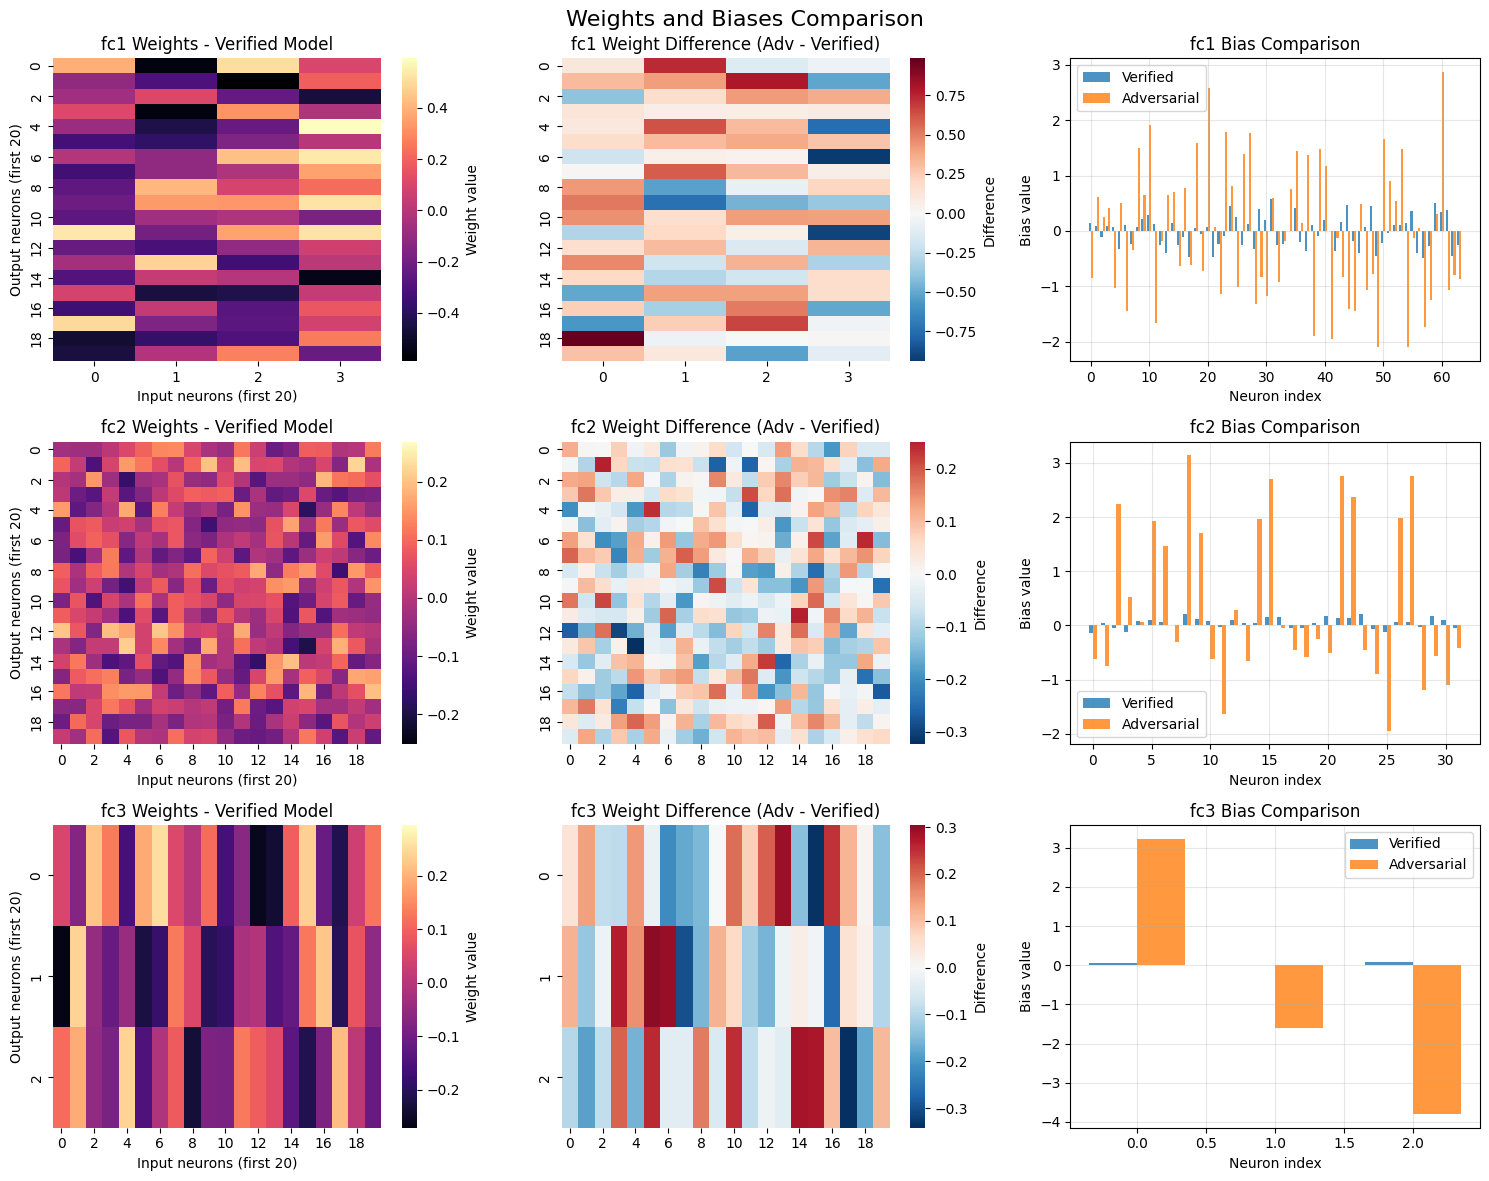

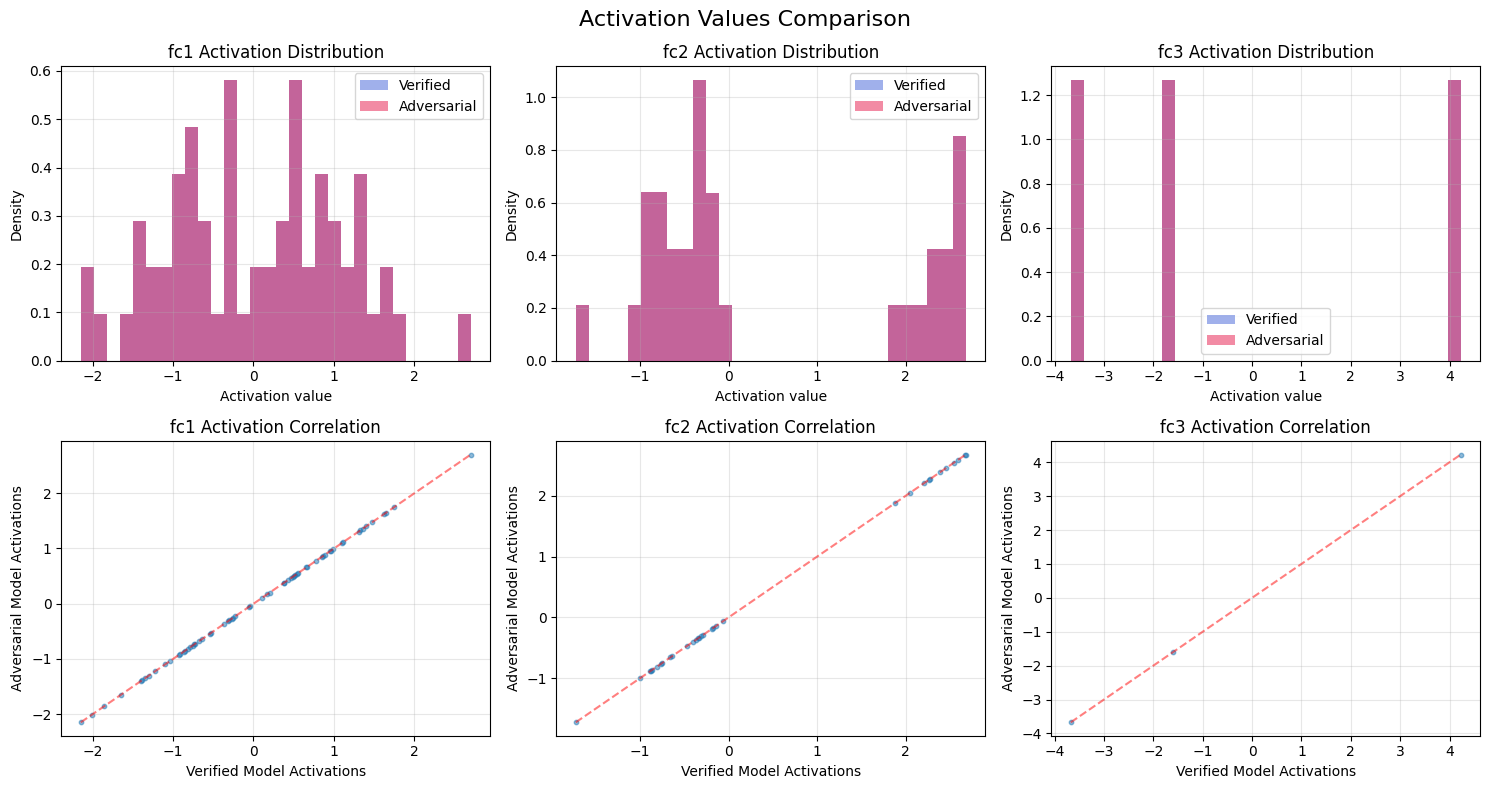

In [49]:
plot_weights_biases_comparison(verified_model, adv_model)

plot_activation_comparison(target_activations,adv_activations)